You are given a dataset of a company's advertising spend on TV,radio ans Newspapers, the dataset contains the following information :


TV : the amount of money spent on Tv advertisements in USD.
Radio : the amount of money spent on radio advertisements in USD.
Newspaper : the amount of money spent on newspaper advertisements in USD.
Sales : the sales of the company in USD.

Your task is to build a linear regression model is that predict the sales based on the advertising spend on TV,Radio and Newspaper.

The eqution of your linear regressiob model will be the form of $$\\Sales = Theta_0*Theta_1*Tv + Theta_2*Radio + Theta_3*Newspaper $$ 

Tv, Radio and Newspaper are features of the model.

In [2]:
import torch 
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [41]:
RANDOME_SEED = 45 
torch.manual_seed(RANDOME_SEED)

# Syntehtic dataset for the features 

TV = torch.rand(9)
RADIO = torch.rand(9)
NEWSPAPER = torch.rand(9)

# Weight and bias for the model
t0, t1, t2, t3 = torch.rand(4)

sales = t1*t2*TV + t0 + t2*RADIO + t3*NEWSPAPER

In [51]:
stack = torch.stack((TV, RADIO, NEWSPAPER), dim = 1 )
stack = stack.reshape(-1)[:9]



(torch.Size([9]), torch.Size([9]))

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(stack,sales,
                                                 test_size= 0.3,
                                                 random_state= RANDOME_SEED)

In [76]:
class LinearRegression(nn.Module) :
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.rand(1), requires_grad = True)

    def forward(self,stack) :
        return self.weights*stack

In [77]:
model = LinearRegression()
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.001)

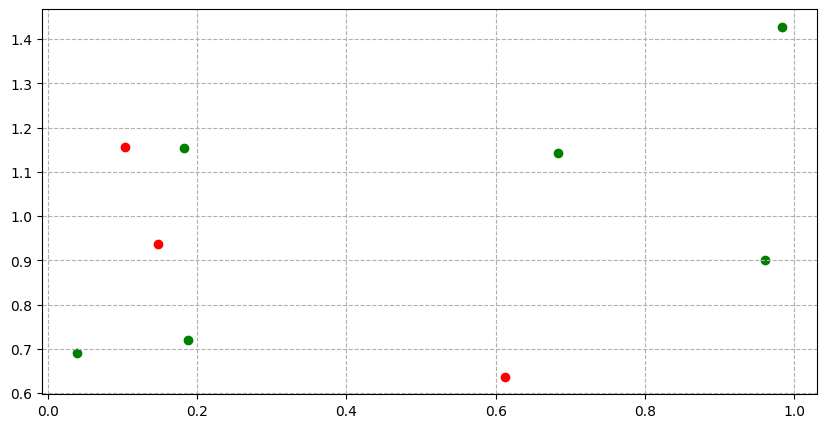

In [80]:
def visualization(training_data = X_train,
                  training_labels = Y_train,
                  testing_data = X_test,
                  testing_labels = Y_test,
                  inference = None) :
    
    plt.figure(figsize=(10,5))       

    plt.scatter(training_data,training_labels, c = "green" , label = "Trainning data")
    plt.scatter(testing_data,testing_labels, c = "red" , label = "Trainning data")
    plt.grid(True,linestyle = "--")

    if inference is not None :
        plt.plot(X_test,inference, c = "blue", label = "Inference")

visualization(inference=None)


In [90]:
epochs = 150000

for numbers in range(epochs) :
    model.train()
    optimizer.zero_grad()
    prediction = model(X_train)
    loss = loss_function(prediction,Y_train)
    loss.backward()
    optimizer.step()

In [93]:
model.state_dict()

OrderedDict([('weights', tensor([1.4520]))])

(OrderedDict([('weights', tensor([1.4520]))]),
 tensor([0.8890, 0.1506, 0.2149]))

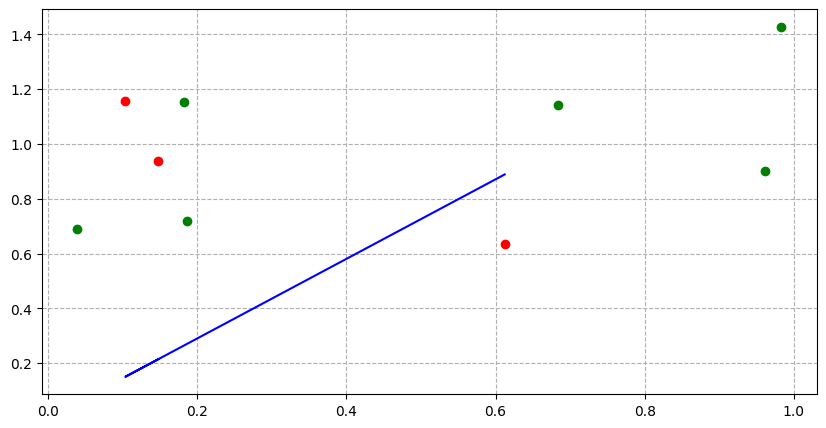

In [94]:

with torch.inference_mode() :
    prediction = model(X_test)


visualization(inference = prediction)
model.state_dict(),prediction